In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Построим гистограммы переменных.

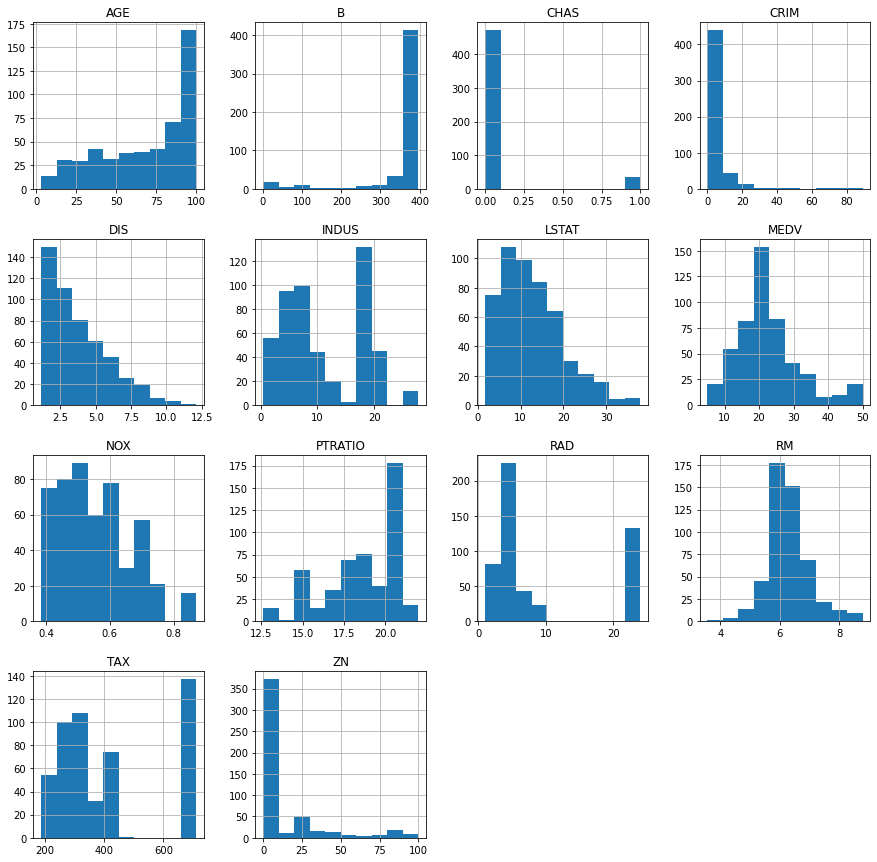

In [7]:
data.hist(figsize=(15,15))
plt.show()

### <center> CRIM

Проанализируем переменную CRIM. Построим диаграмму размаха.

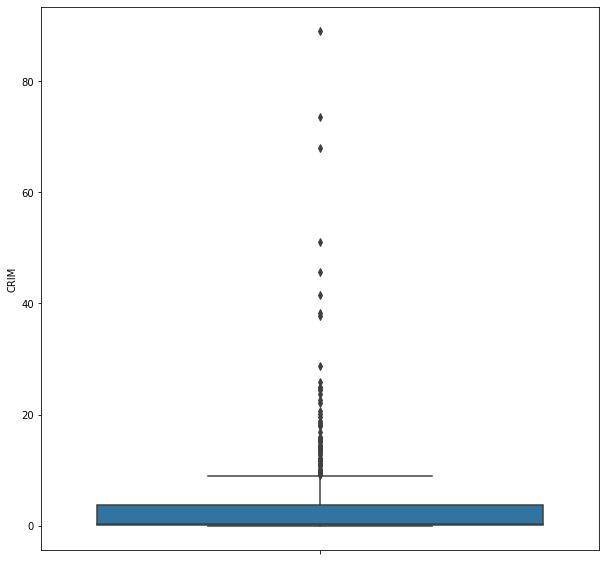

In [8]:
plt.rcParams['figure.figsize'] = (10,10)
ax = sns.boxplot(y = 'CRIM', data = data)

ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('CRIM', fontsize = 10)
ax.tick_params(labelsize = 10)
plt.show()

Диаграмма размаха позволяет установить 8 выбросов, которые целесообразно удалить.

In [9]:
len(data[data.CRIM > 30])

8

In [10]:
data = data[data.CRIM <= 30]

In [52]:
data = data.reset_index()

### <center> ZN

Рассмотрим следующую переменную - ZN. Можно заметить, что минимальное значение, медиана и 25-квартиль равны 0.

In [53]:
data.ZN.describe()

count    498.000000
mean      11.546185
std       23.464449
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [54]:
data[data.ZN == 0].head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_far_away
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0
5,5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0.0


Исходя из описания переменной, можно сделать вывод о том, что 364 записи имеют площадь жилого участка меньше 25 000 кв. футов (примерно, 23 сотки). Данных, явно подлежащих исключению, установить не удается.

### <center> INDUS

In [55]:
data.INDUS.describe()

count    498.00000
mean      11.02492
std        6.85777
min        0.46000
25%        5.13000
50%        8.56000
75%       18.10000
max       27.74000
Name: INDUS, dtype: float64

Распределение бимодальное. Вероятно, это соответсвует районам с большей долей индустриальных объектов и с меньшей долей индустриальных объектов.

### <center> CHAS

In [56]:
data.CHAS.describe()

count    498.000000
mean       0.070281
std        0.255877
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

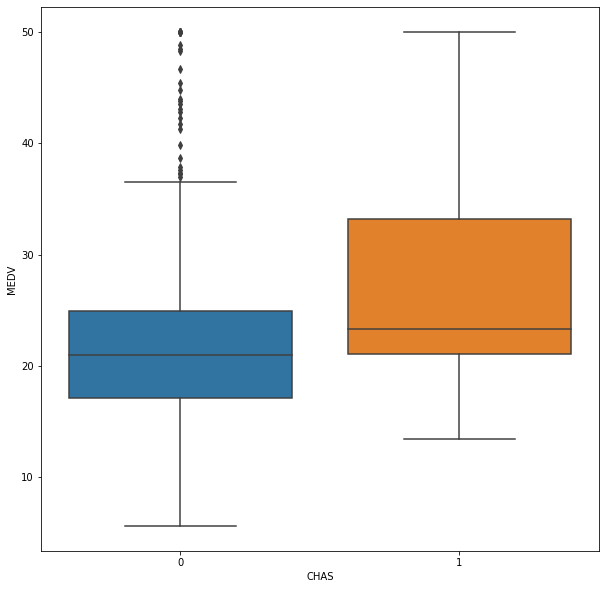

In [57]:
plt.rcParams['figure.figsize'] = (10,10)
ax = sns.boxplot(x = 'CHAS', y = 'MEDV', data = data)

ax.set_xlabel('CHAS', fontsize = 10)
ax.set_ylabel('MEDV', fontsize = 10)
ax.tick_params(labelsize = 10)
plt.show()

По диаграмме размаха можно заметить, что дома у реки стоят дороже, чем дома без близкого расположения водных объектов.

### <center> NOX

In [58]:
data.NOX.describe()

count    498.000000
mean       0.552766
std        0.115729
min        0.385000
25%        0.448250
50%        0.535000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

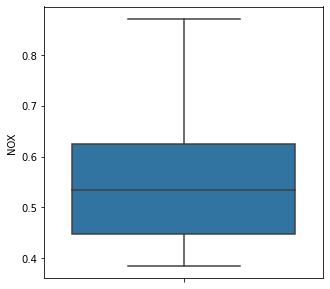

In [59]:
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(y = 'NOX', data = data)

ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('NOX', fontsize = 10)
ax.tick_params(labelsize = 10)
plt.show()

По диаграмме размаха выбросы не заметны, поэтому удалять строки не будем.

### <center> RM

In [60]:
data.RM.describe()

count    498.000000
mean       6.293082
std        0.700201
min        3.561000
25%        5.888250
50%        6.211000
75%        6.628000
max        8.780000
Name: RM, dtype: float64

Среднее количество комант в жилище составляет 6. Данные, однозначно подлежащие удалению, отсутсвуют.

### <center> AGE

In [61]:
data.AGE.describe()

count    498.000000
mean      68.158434
std       28.162623
min        2.900000
25%       43.875000
50%       76.700000
75%       93.875000
max      100.000000
Name: AGE, dtype: float64

<AxesSubplot:>

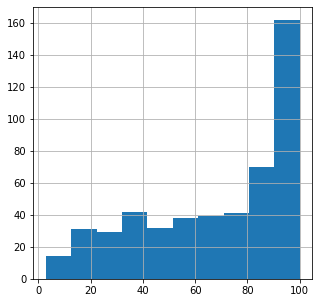

In [62]:
data.AGE.hist()

Дома достаточно старые.

### <center> DIS

In [63]:
data.DIS.describe()

count    498.000000
mean       3.830554
std        2.103572
min        1.129600
25%        2.113700
50%        3.272100
75%        5.214600
max       12.126500
Name: DIS, dtype: float64

<AxesSubplot:>

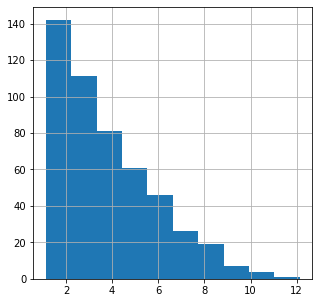

In [64]:
data.DIS.hist()

Явно выраженных особенностей у распределения нет. Данные, явно полежащие удалению, отсутсвуют.

### <center> RAD

In [65]:
data.RAD.describe()

count    498.000000
mean       9.317269
std        8.580296
min        1.000000
25%        4.000000
50%        5.000000
75%        8.000000
max       24.000000
Name: RAD, dtype: float64

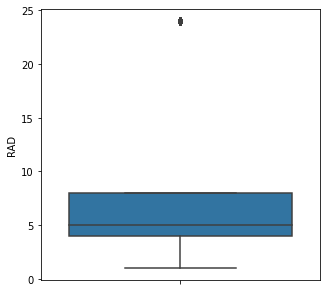

In [66]:
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(y = 'RAD', data = data)

ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('RAD', fontsize = 10)
ax.tick_params(labelsize = 10)
plt.show()

In [67]:
len(data[data.RAD > 10])

124

Присутсвуют дома, которые сильно удалены от радиальных магистралей, но их много, поэтому удаление строк -- нецелесообразно.
Добавим новый столбец "RAD_far_away", в котором будет содержаться категориальная переменная.
Переменная будет принимать значение 1 для домов, для которых индекс доступности превышает 10, и 0 для домов, для которых индекс доступности меньше или равен 10.

In [68]:
data.loc[data.RAD >  10, 'RAD_far_away'] = 1
data.loc[data.RAD <= 10, 'RAD_far_away'] = 0

In [69]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_far_away
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         498 non-null    int64  
 1   CRIM          498 non-null    float64
 2   ZN            498 non-null    float64
 3   INDUS         498 non-null    float64
 4   CHAS          498 non-null    int64  
 5   NOX           498 non-null    float64
 6   RM            498 non-null    float64
 7   AGE           498 non-null    float64
 8   DIS           498 non-null    float64
 9   RAD           498 non-null    int64  
 10  TAX           498 non-null    int64  
 11  PTRATIO       498 non-null    float64
 12  B             498 non-null    float64
 13  LSTAT         498 non-null    float64
 14  MEDV          498 non-null    float64
 15  RAD_far_away  498 non-null    float64
dtypes: float64(12), int64(4)
memory usage: 62.4 KB


### <center> TAX

In [71]:
data.TAX.describe()

count    498.000000
mean     404.096386
std      166.659277
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

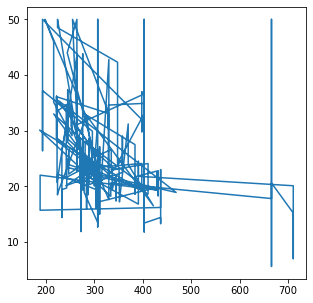

In [72]:
plt.plot(data.TAX, data.MEDV)

Малевич, ранние годы...

Text(0, 0.5, 'MEDV')

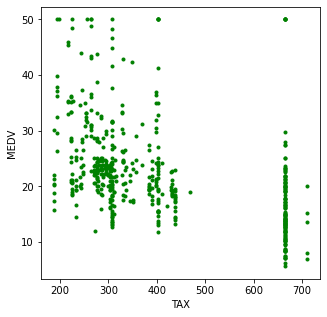

In [73]:
plt.plot(data.TAX, data.MEDV, 'g.')
plt.xlabel('TAX')
plt.ylabel('MEDV')

Видно, что есть группа домов, для которых ставка налога очень высокая (превышает 500 \\$ на 10000 \\$ стоимости объекта в год).
Добавим новый столбец TAX_high, в котором будет содержаться категориальная переменная.
Переменная будет принимать значение 1 для домов со ставкой налога свыше 500 \\$, и 0 для домов со ставкой налога до 500 \\$.

In [74]:
data.loc[data.TAX >  500, 'TAX_high'] = 1
data.loc[data.TAX <= 500, 'TAX_high'] = 0

In [75]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_far_away,TAX_high
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.0,0.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0,0.0
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0,0.0
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0,0.0
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0,0.0


### <center> PTRATIO

In [76]:
data.PTRATIO.describe()

count    498.000000
mean      18.427510
std        2.170867
min       12.600000
25%       17.075000
50%       18.950000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

<AxesSubplot:>

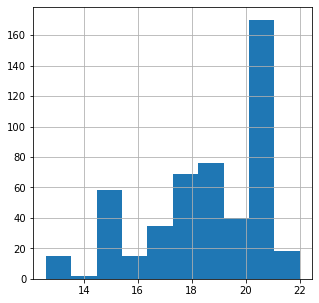

In [77]:
data.PTRATIO.hist()

Явно выраженных особенностей у распределения нет. Данные, явно полежащие удалению, отсутсвуют.

### <center> B

In [78]:
data.B.describe()

count    498.000000
mean     359.121867
std       87.140830
min        0.320000
25%      376.057500
50%      391.600000
75%      396.225000
max      396.900000
Name: B, dtype: float64

<AxesSubplot:>

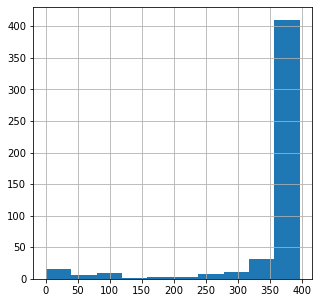

In [79]:
data.B.hist()

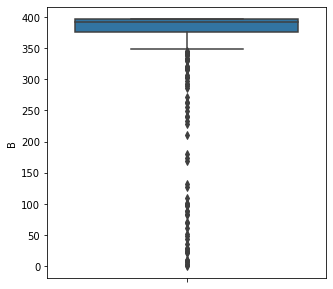

In [80]:
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(y = 'B', data = data)

ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('B', fontsize = 10)
ax.tick_params(labelsize = 10)
plt.show()

Есть очень большой левый "хвост" распределения. 

Text(0, 0.5, 'MEDV')

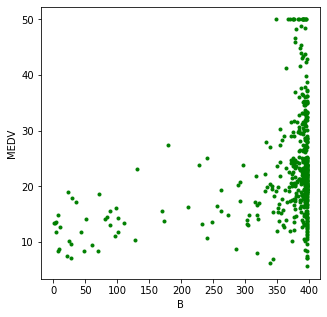

In [81]:
plt.plot(data.B, data.MEDV, 'g.')
plt.xlabel('B')
plt.ylabel('MEDV')

Как ни странно, но районы с большой долей афроамериканцев цены на дома не только не ниже, но даже выше.

Целесообразно добавить новую категориальную переменную.

In [82]:
data.loc[data.B > 350, 'B_high'] = 1
data.loc[data.B <= 350, 'B_high'] = 0

### <center> LSTAT

In [83]:
data.LSTAT.describe()

count    498.000000
mean      12.494096
std        7.007974
min        1.730000
25%        6.905000
50%       11.265000
75%       16.635000
max       37.970000
Name: LSTAT, dtype: float64

Text(0, 0.5, 'MEDV')

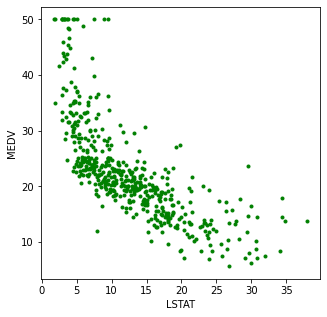

In [84]:
plt.plot(data.LSTAT, data.MEDV, 'g.')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Ожидаемо, что в районах с большим процентным соотношением бедного населения цена на дом ниже.

### <center> Построение модели

Перед нормированием выделим группу числовых и категориальных переменных

In [85]:
data.describe()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_far_away,TAX_high,B_high
count,498.000000,498.000000,498.000000,498.00000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,250.018072,2.778287,11.546185,11.02492,0.070281,0.552766,6.293082,68.158434,3.830554,9.317269,404.096386,18.427510,359.121867,12.494096,22.753012,0.248996,0.259036,0.845382
std,146.045877,5.088265,23.464449,6.85777,0.255877,0.115729,0.700201,28.162623,2.103572,8.580296,166.659277,2.170867,87.140830,7.007974,9.094994,0.432866,0.438546,0.361904
min,0.000000,0.006320,0.000000,0.46000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.600000,0.000000,0.000000,0.000000
25%,124.250000,0.080573,0.000000,5.13000,0.000000,0.448250,5.888250,43.875000,2.113700,4.000000,279.000000,17.075000,376.057500,6.905000,17.225000,0.000000,0.000000,1.000000
50%,248.500000,0.247510,0.000000,8.56000,0.000000,0.535000,6.211000,76.700000,3.272100,5.000000,330.000000,18.950000,391.600000,11.265000,21.400000,0.000000,0.000000,1.000000
75%,372.750000,3.103700,12.500000,18.10000,0.000000,0.624000,6.628000,93.875000,5.214600,8.000000,666.000000,20.200000,396.225000,16.635000,25.000000,0.000000,1.000000,1.000000
max,505.000000,28.655800,100.000000,27.74000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,1.000000,1.000000


In [86]:
bool_var = ['RAD_far_away', 'TAX_high', 'B_high']
bool_var

['RAD_far_away', 'TAX_high', 'B_high']

In [87]:
real_var = data.drop(bool_var + ['MEDV'], axis = 1)
real_var.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [88]:
cat_var = data[bool_var]
cat_var.head()

,RAD_far_away,TAX_high,B_high
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [89]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RAD_far_away  498 non-null    float64
 1   TAX_high      498 non-null    float64
 2   B_high        498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [90]:
cat_var[pd.isna(cat_var['RAD_far_away'])]

,RAD_far_away,TAX_high,B_high


Произведем нормировку "min-max"

In [91]:
mm_scaler = MinMaxScaler()
mm_scaled_real_var = mm_scaler.fit_transform(real_var)
mm_scaled_real_var = pd.DataFrame(mm_scaled_real_var, columns = real_var.columns)
mm_scaled_real_var.head(5)

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.001980,0.000733,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.003960,0.000732,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.005941,0.000909,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.007921,0.002190,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [92]:
mm_scaled_real_var.describe()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.495085,0.096755,0.115462,0.387277,0.070281,0.345198,0.523488,0.672074,0.245611,0.361620,0.414306,0.619948,0.904740,0.297023
std,0.289200,0.177604,0.234644,0.251385,0.255877,0.238125,0.134164,0.290037,0.191288,0.373056,0.318052,0.230943,0.219731,0.193377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246040,0.002592,0.000000,0.171188,0.000000,0.130144,0.445919,0.421988,0.089489,0.130435,0.175573,0.476064,0.947444,0.142798
50%,0.492079,0.008419,0.000000,0.296921,0.000000,0.308642,0.507760,0.760041,0.194828,0.173913,0.272901,0.675532,0.986636,0.263107
75%,0.738119,0.108113,0.125000,0.646628,0.000000,0.491770,0.587660,0.936921,0.371468,0.304348,0.914122,0.808511,0.998298,0.411286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
mm_scaled_real_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    498 non-null    float64
 1   CRIM     498 non-null    float64
 2   ZN       498 non-null    float64
 3   INDUS    498 non-null    float64
 4   CHAS     498 non-null    float64
 5   NOX      498 non-null    float64
 6   RM       498 non-null    float64
 7   AGE      498 non-null    float64
 8   DIS      498 non-null    float64
 9   RAD      498 non-null    float64
 10  TAX      498 non-null    float64
 11  PTRATIO  498 non-null    float64
 12  B        498 non-null    float64
 13  LSTAT    498 non-null    float64
dtypes: float64(14)
memory usage: 54.6 KB


Объединим отнормированные данные с категориальными переменными

In [94]:
X_mm = mm_scaled_real_var.join(cat_var)

In [95]:
X_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         498 non-null    float64
 1   CRIM          498 non-null    float64
 2   ZN            498 non-null    float64
 3   INDUS         498 non-null    float64
 4   CHAS          498 non-null    float64
 5   NOX           498 non-null    float64
 6   RM            498 non-null    float64
 7   AGE           498 non-null    float64
 8   DIS           498 non-null    float64
 9   RAD           498 non-null    float64
 10  TAX           498 non-null    float64
 11  PTRATIO       498 non-null    float64
 12  B             498 non-null    float64
 13  LSTAT         498 non-null    float64
 14  RAD_far_away  498 non-null    float64
 15  TAX_high      498 non-null    float64
 16  B_high        498 non-null    float64
dtypes: float64(17)
memory usage: 66.3 KB


In [98]:
y = data['MEDV']

In [99]:
rand_state = 1000
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=rand_state)

In [100]:
X_mm_train.shape, X_mm_test.shape, y_mm_train.shape, y_mm_test.shape

((398, 17), (100, 17), (398,), (100,))

In [101]:
def mape(y_test, y_pred): 
    return (np.abs(y_test - y_pred) / y_test * 100)[y_test != 0].mean()

In [102]:
X_mm_train.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RAD_far_away,TAX_high,B_high
327,0.647525,0.008192,0.0,0.253666,0.0,0.222222,0.483234,0.420185,0.389773,0.173913,0.190840,0.744681,1.000000,0.305188,0.0,0.0,1.0
397,0.790099,0.345913,0.0,0.646628,0.0,0.633745,0.438973,0.771370,0.033719,1.000000,0.914122,0.808511,0.851884,0.779249,1.0,1.0,0.0
446,0.899010,0.331849,0.0,0.646628,0.0,0.674897,0.606821,0.939238,0.124262,1.000000,0.914122,0.808511,0.016037,0.468543,1.0,1.0,0.0
310,0.613861,0.091770,0.0,0.346041,0.0,0.327160,0.270550,0.359423,0.126381,0.130435,0.223282,0.617021,0.882874,0.301049,0.0,0.0,1.0
75,0.148515,0.003100,0.0,0.453446,0.0,0.106996,0.522131,0.433574,0.306723,0.173913,0.402672,0.648936,0.965530,0.198951,0.0,0.0,1.0


In [103]:
X_mm_train.describe()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RAD_far_away,TAX_high,B_high
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.492945,0.095894,0.114548,0.389223,0.080402,0.345699,0.521690,0.672034,0.243837,0.354162,0.412060,0.622661,0.905109,0.298865,0.241206,0.251256,0.841709
std,0.283972,0.178957,0.228708,0.250618,0.272257,0.240431,0.136542,0.292322,0.189960,0.369644,0.314154,0.228368,0.217142,0.198382,0.428353,0.434282,0.365473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251980,0.002557,0.000000,0.173387,0.000000,0.131687,0.445440,0.409372,0.088448,0.130435,0.175573,0.476064,0.946310,0.142039,0.000000,0.000000,1.000000
50%,0.492079,0.007697,0.000000,0.317632,0.000000,0.294239,0.507664,0.764676,0.194405,0.173913,0.272901,0.680851,0.986636,0.253587,0.000000,0.000000,1.000000
75%,0.726238,0.090147,0.178750,0.646628,0.000000,0.491770,0.588044,0.937951,0.373521,0.304348,0.820134,0.808511,0.998216,0.418736,0.000000,0.750000,1.000000
max,1.000000,1.000000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,0.871218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
X_mm_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 327 to 435
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         398 non-null    float64
 1   CRIM          398 non-null    float64
 2   ZN            398 non-null    float64
 3   INDUS         398 non-null    float64
 4   CHAS          398 non-null    float64
 5   NOX           398 non-null    float64
 6   RM            398 non-null    float64
 7   AGE           398 non-null    float64
 8   DIS           398 non-null    float64
 9   RAD           398 non-null    float64
 10  TAX           398 non-null    float64
 11  PTRATIO       398 non-null    float64
 12  B             398 non-null    float64
 13  LSTAT         398 non-null    float64
 14  RAD_far_away  398 non-null    float64
 15  TAX_high      398 non-null    float64
 16  B_high        398 non-null    float64
dtypes: float64(17)
memory usage: 56.0 KB


In [105]:
def lin_reg_fit(X_train, X_test, y_train, y_test):
    estimator = LinearRegression()
    estimator.fit(X_train, y_train)

    train_pred = estimator.predict(X_train)
    test_pred = estimator.predict(X_test)
    
    train_mape = mape(train_pred, y_train)
    test_mape = mape(test_pred, y_test)
    
    print(f'Train MAPE: {np.round(train_mape, 4)}')
    print(f'Test MAPE: {np.round(test_mape, 4)}')
    
    return estimator

In [106]:
mm_est = lin_reg_fit(X_mm_train, X_mm_test, y_mm_train, y_mm_test)

Train MAPE: 19.5365
Test MAPE: 14.8984


Получен относительно неплохой результат. Но проведем еще 2 эксперимента


Попробуем обучить модель на исходных данных, без добавления категориальных переменных

In [107]:
X_mm = mm_scaled_real_var

In [108]:
rand_state = 1000
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=rand_state)

In [110]:
mm_est_without_cat = lin_reg_fit(X_mm_train, X_mm_test, y_mm_train, y_mm_test)

Train MAPE: 19.6944
Test MAPE: 14.691


Можно предположить, что добавление категориальных переменных не влияет на качество модели

Попробуем теперь удалить количественные переменные, на основе которых были созданы категориальные, и повторно обучить модель

In [112]:
X_mm = mm_scaled_real_var.join(cat_var)

In [114]:
X_mm = X_mm.drop(['RAD', 'TAX', 'B'], axis = 1)

In [116]:
rand_state = 1000
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=rand_state)

In [117]:
mm_est_without_cat = lin_reg_fit(X_mm_train, X_mm_test, y_mm_train, y_mm_test)

Train MAPE: 19.5659
Test MAPE: 15.8133


Вывод: получается, что можно было обучать линейную регрессионную модель непосредственно на исходных данных после выполенения нормировки.